#### Revolut Dividends 2024
This Jupyter notebook is intended to help analyze data from an imported revolut statement in csv format regarding dividends collected in 2024.
<br>This is my practice project to learn to work with and analyze data with python and to produce visualizations.

##### What this Jupyter notebook does:
- clean up the data in the imported csv file so they can be analyzed
- display data on dividends collected in USD in 2024
- display data on dividends collected in EUR in 2024
- provide a summary and key insights for year 2024
- show a visualization of dividends collected per ticker regardless of currency

##### Notes:
- this notebook is designed to process data from your Revolut statement. This statement can be generated from your Revolut Invest section (in app: Invest > More > Documents > Brokerage account > Account statement > select Excel). Once you have the xlsx, you just need to save it as a csv.
- this notebook provides insights for dividends collected in EUR or USD
- colors for matplotlib https://matplotlib.org/3.3.0/gallery/color/named_colors.html
- colormaps for matplotlib https://matplotlib.org/stable/users/explain/colors/colormaps.html

##### Space for improvement:
- add a column with 'year' to store the year extracted from 'date'
- additional visualizations
- comparison with other years
- could optimize for currencies other than EUR and USD
- could fetch live exchange rates for conversions between EUR and USD



#### Importing the data and cleaning of data

In [1]:
# Import libraries and load data from csv file - 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

data = pd.read_csv("randomized_statement.csv")

# CLEANING UP

# 1. Remove spaces from column names and make them lowercase
data.columns = data.columns.str.replace(" ", "_").str.lower()

# 2. Change 'â‚¬' to '€' [optional]
# There seems to be an issue with encoding in the statement files, but this step is not necessary because the currency symbols are removed in step 4
data = data.replace("â‚¬", "€")

# 3. Create a new dataframe "dividend" to work with, containing only dividend rows and dropping unnecessary columns
dividend = data[data["type"] == "DIVIDEND"].drop(columns=["quantity", "price_per_share", "fx_rate"])

# 4. Remove non-numeric symbols (like '$' or '€') from the 'total_amount' column so we can work with the numbers
# regular expression pattern r"[^\d.]" matches any character that is not a digit (0-9) or a period (.)
# this removes any non-numeric symbols, such as '$' or '€', or thousands separators ','
dividend["total_amount"] = dividend["total_amount"].replace(r"[^\d.]", "", regex=True).astype(float)

# 5. Format the 'date' column to 'YYYY-MM-DD' to exclude the time component
dividend['date'] = pd.to_datetime(dividend['date']).dt.strftime('%Y-%m-%d') # format 'date' column to exclude time converting it to a string
dividend['date'] = pd.to_datetime(dividend['date']) # Convert back to datetime for .dt access (avoid getting AttributeError later)

# Have a look at the dataframe we will be working with
dividend.head()

,date,ticker,type,total_amount,currency
90,2024-05-14,AAPL,DIVIDEND,39.72,USD
116,2024-12-10,AAPL,DIVIDEND,94.31,USD
124,2025-01-11,AAPL,DIVIDEND,86.28,USD
131,2025-07-14,AAPL,DIVIDEND,91.89,USD
153,2025-09-25,AMD,DIVIDEND,25.48,EUR


#### Overall dividend data from the imported statement not limited by year, list of currencies

                 dividends_collected
ticker currency                     
AAPL   USD                    312.20
AMD    EUR                     25.48
AMZN   USD                     19.64
BABA   EUR                     72.89
BRK.A  EUR                     56.96
JPM    EUR                     71.08
META   EUR                     40.69
MSFT   USD                     55.85
NFLX   USD                     43.67
NVDA   USD                     41.03
TSLA   EUR                    163.70
V      EUR                     97.32

List of currencies in this statement: USD, EUR

Visualization: Overall dividends collected by ticker regardless of year or currency


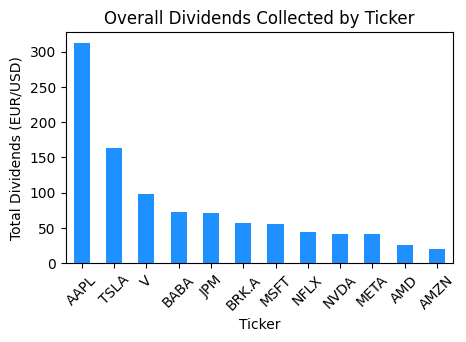

In [2]:
# quick overview of overall dividends collected per ticker, not limited by year
overview = dividend.groupby(['ticker', 'currency']).agg(dividends_collected=('total_amount', 'sum'))
print(overview)

print(f'\nList of currencies in this statement: {', '.join(dividend["currency"].unique())}')

# add a visualization showcasing all unique tickers and overall dividends collected
print(f'\nVisualization: Overall dividends collected by ticker regardless of year or currency')
dividends_by_ticker = dividend.groupby('ticker')['total_amount'].sum()

plt.figure(figsize=(5,3)) # size of chart
dividends_by_ticker.sort_values(ascending=False).plot(kind='bar', color='dodgerblue')
plt.title("Overall Dividends Collected by Ticker")
plt.xlabel("Ticker")
plt.ylabel("Total Dividends (EUR/USD)")
plt.xticks(rotation=45) # improve readability
plt.show()

#### Data for year 2024 in USD

  ticker currency  dividends_collected
0   AAPL      USD               134.03
1   NFLX      USD                26.15
2   NVDA      USD                41.03
3  Total      USD               201.21

Visualization: Dividends collected by ticker in year 2024 in USD


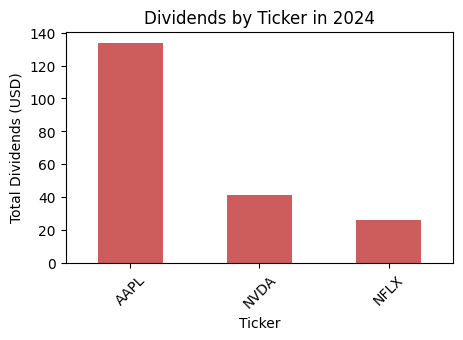

In [3]:
# Analyze dividends collected in USD for the year 2024

# Filter the 'dividend' DataFrame to include only transactions in USD and the year 2024
dividend2024_usd = dividend[(dividend["currency"] == "USD") & (dividend['date'].dt.year == 2024)]

# Group the filtered data by 'ticker' and 'currency' and calculate the sum of 'total_amount'
# This aggregates the dividend amounts for each unique ticker in USD for 2024.
dividend2024_usd = dividend2024_usd.groupby(['ticker', 'currency']).agg(
    dividends_collected=('total_amount', 'sum')
    ).reset_index()

# Calculate the total sum of dividends collected in USD for 2024
total_sum_usd = dividend2024_usd["dividends_collected"].sum()

# Create a DataFrame for the 'Total' row to display the grand total
total_row_usd = pd.DataFrame([{"ticker": "Total", "currency": "USD", "dividends_collected": total_sum_usd}])

# Append the 'Total' row to the main DataFrame
# ignore_index=True to have a clean, new index
dividend2024_usd = pd.concat([dividend2024_usd, total_row_usd], ignore_index=True)

# Display the resulting DataFrame showing the total dividends collected per ticker in USD for 2024,
# with an added row for the overall total.
print(dividend2024_usd)

# add a visualization showcasing all unique tickers and dividends collected in USD in 2024

print(f'\nVisualization: Dividends collected by ticker in year 2024 in USD')
dividends_by_ticker = dividend[(dividend['date'].dt.year == 2024) & (dividend['currency'] == 'USD')].groupby('ticker')['total_amount'].sum()

plt.figure(figsize=(5,3))
dividends_by_ticker.sort_values(ascending=False).plot(kind='bar', color='indianred')
plt.title("Dividends by Ticker in 2024")
plt.xlabel("Ticker")
plt.ylabel("Total Dividends (USD)")
plt.xticks(rotation=45)
plt.show()

#### Data for year 2024 in EUR

  ticker currency  dividends_collected
0   BABA      EUR                72.89
1  BRK.A      EUR                56.96
2    JPM      EUR                71.08
3   META      EUR                40.69
4   TSLA      EUR                94.90
5      V      EUR                97.32
6  Total      EUR               433.84

Visualization: Dividends collected by ticker in year 2024 in EUR


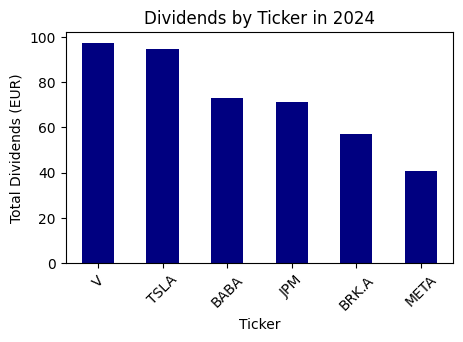

In [4]:
dividend2024_eur = dividend[(dividend["currency"] == "EUR") & (dividend['date'].dt.year == 2024)]

dividend2024_eur = dividend2024_eur.groupby(['ticker', 'currency']).agg(
    dividends_collected=('total_amount', 'sum')
    ).reset_index()

total_sum_eur = dividend2024_eur["dividends_collected"].sum()
total_row_eur = pd.DataFrame([{"ticker": "Total", "currency": "EUR", "dividends_collected": total_sum_eur}])

dividend2024_eur = pd.concat([dividend2024_eur, total_row_eur], ignore_index=True)

print(dividend2024_eur)

# add a visualization showcasing all unique tickers and dividends collected in EUR in 2024
print(f'\nVisualization: Dividends collected by ticker in year 2024 in EUR')

dividends_by_ticker = dividend[(dividend['date'].dt.year == 2024) & (dividend['currency'] == 'EUR')].groupby('ticker')['total_amount'].sum()

plt.figure(figsize=(5,3))
dividends_by_ticker.sort_values(ascending=False).plot(kind='bar', color='navy')
plt.title("Dividends by Ticker in 2024")
plt.xlabel("Ticker")
plt.ylabel("Total Dividends (EUR)")
plt.xticks(rotation=45)
plt.show()

#### Summary and key insights for year 2024

Here are the key insights:
In 2024, dividends were paid by a total of 9 unique instruments: AAPL, BABA, BRK.A, JPM, META, NFLX, NVDA, TSLA, V.
The highest dividend paying instrument in your portfolio in 2024 was AAPL.
Dividends for year 2024 totalled 433.84 EUR and 201.21 USD.
This sums up to a grand total of 620.97 EUR (USD converted to EUR using the provided rate) or 669.76 USD (EUR converted to USD using the provided rate).
FX Rate used: 1 EUR = 1.08 USD, 1 USD = 0.93 EUR (Updated on 2025/03/26).

Visualization: A bar chart showing all dividends collected by ticker in 2024 regardless of currency


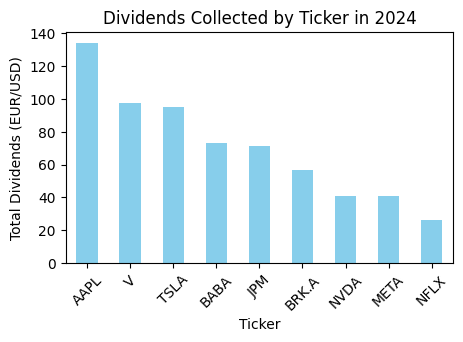

Visualization: A pie chart showing the proportion of overall dividends contributed by each ticker in 2024 regardless of currency


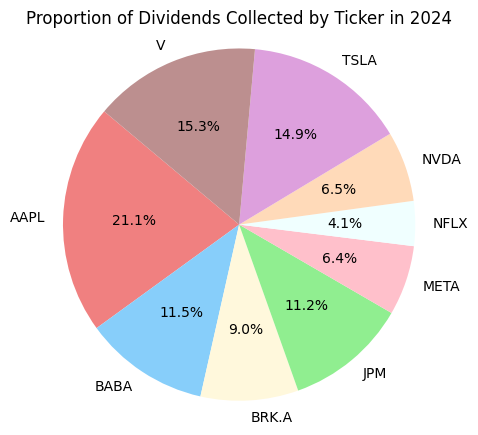

In [20]:
# A list of unique tickers which are present in the dividend statement for year 2024
unique_tickers_2024 = dividend.loc[dividend['date'].dt.year == 2024, 'ticker'].unique()
# The ticker which had the highest sum paid out in 2024
top_ticker_2024 = dividend[dividend['date'].dt.year == 2024].groupby('ticker')['total_amount'].sum().idxmax()

print(f'Here are the key insights:')
print(f'In 2024, dividends were paid by a total of {len(unique_tickers_2024)} unique instruments: {", ".join(unique_tickers_2024)}.')
print(f'The highest dividend paying instrument in your portfolio in 2024 was {top_ticker_2024}.')
print(f'Dividends for year 2024 totalled {total_sum_eur:.2f} EUR and {total_sum_usd:.2f} USD.')
print(f'This sums up to a grand total of {total_sum_eur + (total_sum_usd * 0.93):.2f} EUR (USD converted to EUR using the provided rate) or {total_sum_usd + (total_sum_eur * 1.08):.2f} USD (EUR converted to USD using the provided rate).')
print(f'FX Rate used: 1 EUR = 1.08 USD, 1 USD = 0.93 EUR (Updated on 2025/03/26).')

# add a visualization showcasing dividends collected by ticker in 2024
print(f'\nVisualization: A bar chart showing all dividends collected by ticker in 2024 regardless of currency')
dividends_by_ticker = dividend[dividend['date'].dt.year == 2024].groupby('ticker')['total_amount'].sum()

plt.figure(figsize=(5,3))
dividends_by_ticker.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Dividends Collected by Ticker in 2024")
plt.xlabel("Ticker")
plt.ylabel("Total Dividends (EUR/USD)")
plt.xticks(rotation=45)
plt.show()


# add a visualization showcasing the contribution of each ticker to overall dividends in 2024
print(f'Visualization: A pie chart showing the proportion of overall dividends contributed by each ticker in 2024 regardless of currency')
dividends_by_ticker = dividend[dividend['date'].dt.year == 2024].groupby('ticker')['total_amount'].sum()

# Determine the number of slices aka unique tickers
num_slices = len(dividends_by_ticker)
# or:
# num_slices = len(unique_tickers_2024)

# Choose colors to appear in the pie chart
colors = ['lightcoral', 'lightskyblue', 'cornsilk', 'lightgreen', 'pink', 'azure', 'peachpuff', 'plum', 'rosybrown', 'thistle'] 

plt.figure(figsize=(5, 5))
plt.pie(dividends_by_ticker.values, labels=dividends_by_ticker.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Proportion of Dividends Collected by Ticker in 2024")
plt.axis('equal')
plt.show()